# SEE125: Numerical Integration 

## Here fill in:
- **Group Nr.**: 45
- **Names**: Ludwig Lewis & Erik Dahllöf

### In this set of exercises you will:
- Implement multiple techniques to numerically calculate the integral of functions and tabulated data.
- Investigate the errors associated with different techniques.

#### The learning objectives are:
- Being able to determine the integral using numerical methods
- Understanding the errors of different implementations


In [11]:
# Initialisation code for the notebook
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Simple function integration
Here you will calculate the integral of a simple function using two different methods. The function in question is:
\begin{equation}
\int_0^2 (x^4 - 2x +1) dx.
\end{equation}
 
This integral is actually one that you can calculate yourself and has the exact value of 4.4. You can compare your answers with this value.

First make a plot of the function that should be integrated (the integrand). 

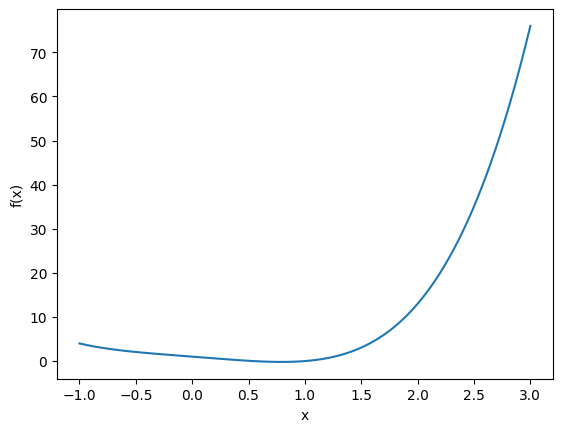

In [12]:
# Your function and plot 
def f(x):
    return x**4 -2*x +1
fig, ax = plt.subplots()
x = np.linspace(-1,3,1000)
ax.plot(x,f(x))
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
plt.show()

### Exercise 1a: The Rectangle Rule

The first Newton-Cotes method of calculating an integral is the rectangle rule. 

Write code to calculate the integral using both the *left* and *right* rectangle rule with $n = 11$ points in the integral range (so 10 "steps").

In [13]:
# Your Code for the left and right rectangle rule 
def left(f,a,b,n=11):
    x = np.linspace(a,b,n)
    sum = 0
    for i in range(n-1):
        sum += f(x[i])
    sum *= (b-a)/(n-1)
    return sum
def right(f,a,b,n=11):
    x = np.linspace(a,b,n)
    sum = 0
    for i in range(1,n):
        sum += f(x[i])
    sum *= (b-a)/(n-1)
    return sum
print('left', left(f,0,2))
print('right', right(f,0,2))

left 3.306560000000001
right 5.7065600000000005


### Exercise 1b: The Midpoint Rule

A second method (of the Newton-Cotes methods) of calculating an integral is using the midpoint rule. 

Write code to calculate the integral using the midpoint rule with $n = 11$ points in the integral range (so 10 "steps").

In [14]:
# Your code for the midpoint rule
def mid(f,a,b,n=11):
    h = (b-a)/(n-1)
    x = np.arange(a+h/2,b+h/2,h)
    sum = h * np.sum(f(x))
    return sum
print(mid(f,0,2))

4.346760000000005


### Exercise 1c: The Trapezoidal Rule

A third simple method (of the Newton-Cotes methods) of calculating an integral is using the trapezoidal rule. 

Write code to calculate the integral using the trapezoidal rule with $n = 11$ points in the integral range (so 10 "steps").

In [103]:
# Your code for the trapezoidal rule
def trap(f,a,b,n=11):
    h = (b-a)/(n-1)
    x = np.linspace(a,b,n)
    sum = ((f(x[0])+f(x[n-1]))/2 + np.sum(f(x[1:-1])))*h
    return sum
print('left', left(f,0,2))
print('right', right(f,0,2))
print('mid', mid(f,0,2))
print('trap', trap(f,0,2))


left 3.306560000000001
right 5.7065600000000005
mid 4.346760000000005
trap 4.50656


Using your codes, you can play with $N$ to see how many points we need to get a reasonable accuracy. You will do that somewhat more systematically in the final part of exercise 1.

#### Benchmarking the Newton-Cotes Methods

In general, you will often be using your code to calculate an integral for which you do not know the answer. However, in this case, since we do know the answer, you can get a feeling for how accurate your code is by comparing your calculated value to the correct answer. 

This sort of "benchmarking" is an integral part of developing numerical simulation software. In particular, you can always find a way for your code to give you "an answer". But how can you trust that it is the correct answer? How do you know how much influence the approximations you have made have on the calculated result? 

For this, it is always a good idea to use your code to perform a calculation for a case where you know the answer. This will allow you to play around to see how to optimize your code to be more accurate (and also to find bugs!). Of course, getting an accurate answer for one type of calculation does not guarantee that your code will be accurate for all calculations, but by trying it out for different types of calculations, you can start to get a feeling for how it performs and build up some trust that it will give you an accurate answer. 

Here, we will explore such a "benchmarking" of the Newton-Cotes methods for calculating integrals, and explore the number of steps needed to achieve a given accuracy. 

### Exercise 1d:

Use a `while` loop to find the minimum value of $N$ you need to get the correct answer to <a href=https://en.wikipedia.org/wiki/Approximation_error#Formal_Definition>relative error</a> of less than $10^{-6}$ = one part per million (ppm).

The definition of relative error is as follows: if $v$ is the correct answer and $v_{\rm approx}$ is the approximate answer, the relative error $\eta$ is defined as:

\begin{equation}
\eta = \left| \frac{v - v_{\rm approx}}{v} \right|
\end{equation}

Your while loop should have an "emergency exit" test that stops the loop with a `break` statement if $N$ exceeds 10,000.

_Tip:_ If you have trouble with your exit condition on your while loop, it might be handy to include a code line `print("N %d eta %e" % (N,eta))` to keep track of what is going on in your code. This is an <a href=https://pythondebugging.com/articles/python-debugging-with-print-statements>elementary form</a> of <a href=https://en.wikipedia.org/wiki/Debugging>debugging</a>.

In [45]:
# Your benchmarking code
def intbench(int,f,a,b,ans,stepsize=1,eps = 1e-6):
    eta = 1
    N=2
    while (eta >= eps):
        N+=stepsize
        eta = abs((ans-int(f,a,b,N))/ans)
        if(N==10000):
            break
    return N
n = intbench(trap,f,0,2,4.4)
print(n,trap(f,0,2,n))
m = intbench(mid,f,0,2,4.4)
print(m,mid(f,0,2,m))
#

1558 4.400004399987882
1102 4.399995600290244


## Exercise 2: Simpson's Rule

Simpson's rule is a numerical integration technique that replaces the linear approximation of the integrand in the trapizoidal technique with a "best estimate" quadratic approximation.

Write code to implement Simpson's rule for the integral you were asked to solve in exercise 1 using 11 points (10 steps). **Remember that Simpson's rule requires an odd number of points (so an even $N$)**

In [122]:
# Your code for simpson's rule
def simp(f,a,b,n=12):
    h=(b-a)/n
    x=np.arange(a,b+h,h)
    sum= h/3 * (f(x[0])+f(x[n])+2*np.sum(f(x[2:-1:2]))+4*np.sum(f(x[1:-1:2])))
    return sum



4.399455847555865


Perform the same benchmark as you did in Exercise 1. (But remember the requirement on the number of points $N$!!)

In [49]:
# Your benchmark of simpson's rule
intbench(simp,f,0,2,4.4,2)


32

## Exercise 3: Investigating the errors of the different implementations

Similar to the benchmark exercise you used for Numerical Root finding, you can determine the dependence of the errors on the number of steps $N$ (which sets the interval size $h$) to determine the exponent $p$ in the order of the uncertainty $O(h^p)$.

In this exercise you should determine $p$ for **four methods (Right Rectangle, Midpoint, Trapezium and Simpson's method)**. To do this, you should:
1) Define the function and the integral intervel that you want to use. In this case, I suggest you use the same function you used in Exercises 1 and 2 (so that you can use the fact that you know that the exact solution is $4.4$.
2) Define a function *bencherror* that you can call with the name of the method you are benchmarking. The output from this function should be $h$ and the relative error $\eta$ (as defined in Exercise 1d).
3) Plot the values of the relative error $\eta$ for increasing $h$ (and thus increasing $N$, start from $N_{\rm min}=6$ to $N_{\rm max}=10^4$). (choose the best way to plot, note that the calculations will take some time depending on your choice of interval and function, and remember the special requirement for Simpson's rule!!).
4) Perform a fit to determine $p$. (For some methods, you could be reaching the numerical roundoff errors, so take that into account in your fit by removing the part of your solutions that are affected by the roundoff errors). Your values of $p$ should be approximately $1, 2, 2,$ and $4$. [Can you fit it using a simple linear function? (remember the useful properties of a power-law function). I would suggest to use the *scipy* *stats* module with the linear regression tool *stats.linregress*.]

LinregressResult(slope=1.4996988240947464, intercept=-0.00015618460189082296, rvalue=0.9987380395072769, pvalue=0.0, stderr=0.0007544063482423728, intercept_stderr=7.098376342711021e-06)


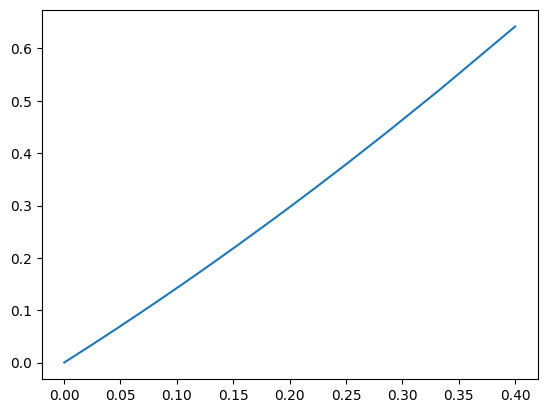

In [181]:
# Your code here
import scipy
def bencherror(method,f,a,b,sol):
    eta = []
    h = []
    stepsize = 1
    if(method == simp):
        stepsize = 2
    for i in range(6,10001,stepsize):
        eta.append(abs((method(f,a,b,i)-sol)/sol)) 
        h.append((b-a)/(i-1))
    #if(method != simp):
     #   for i in range(2,9995):
     #       if(abs(eta[i]-eta[i-1]) > abs(eta[i-1]-eta[i-2])):
     #           eta[i]=eta[i-1]
    #else:
     #   for i in range(2,4997):
     #       eta[i]=eta[i-1]
    return eta, h
etb, h = bencherror(right,f,0,2,4.4)
fig,ax = plt.subplots()
ax.plot(h,etb)
print(scipy.stats.linregress(h,etb))
plt.show()

LinregressResult(slope=0.24104059355334245, intercept=-0.003970882832521214, rvalue=0.9420990379435189, pvalue=5.624443165708279e-10, stderr=0.020222551576013444, intercept_stderr=0.0021095605217287513)


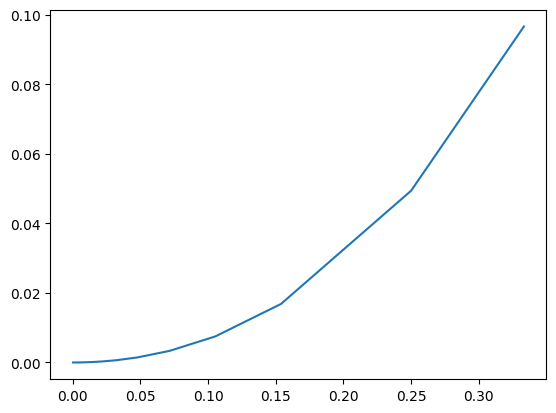

In [185]:
#### BING CHILLING GPT
def bencherror(method):
    a = 0 # lower limit of integration
    b = 2 # upper limit of integration
    exact = 4.4 # exact value of the integral
    Nmin = 6
    Nmax = 10**4
    Nvalues = np.logspace(np.log10(Nmin), np.log10(Nmax), 20).astype(int)
    hvalues = (b-a)/Nvalues
    errors = []
    for N in Nvalues:
        if method == 'Right Rectangle':
            I = right(f, a, b, N)
        elif method == 'Midpoint':
            I = mid(f, a, b, N)
        elif method == 'Trapezium':
            I = trap(f, a, b, N)
        elif method == 'Simpson':
            I = simp(f, a, b, N)
        else:
            raise ValueError('Method not recognized')
        errors.append(abs(I - exact)/exact)
    return hvalues, errors

h ,errors = bencherror('Trapezium')
fig,ax = plt.subplots()
ax.plot(h,errors)
print(scipy.stats.linregress(h,errors))
plt.show()

## Exercise 4: Integrating numerical data

The same techniques for the integration of functions can also be used to integrate numerical data. 

The main difference is that the values of the integrand are not determined by a function call, but instead by looking up it's value in an array. 

For this you will load data from a file `velocities.txt` that is available online (it can also be found in the course File section). The file contains two columns of numbers, the first representing time $t$ in seconds and the second the $x$-velocity in meters per second of a particle, measured once every second from time $t=0$ to $t=100$ seconds.

Read in the data and, using the trapezoidal rule, calculate from them the approximate distance traveled by the particle in the $x$ direction as a function of time. Print the results and plot both the velocity data as well as the distance traveled as a function of time. 

_Hint_ This is a cumulative integral, a bit different than the definite integrals handled above. Your integral code should produce an array not a number! If $h(t)$ is the function describing the velocity as a function of time, then the answer $g(t)$ is given by:

$$
g(t) = \int_0^t h(\tau) d\tau
$$

Every element in your output array is then conceptually defined by computing an integral from $\tau=0$ to $\tau = t$. 


In [10]:
 # Download the resource files. 
import urllib 
urllib.request.urlretrieve("http://www-personal.umich.edu/~mejn/cp/data/velocities.txt", filename="velocities.txt") 


('velocities.txt', <http.client.HTTPMessage at 0x7f7fda59c640>)

In [11]:
# Load the data
data = np.loadtxt("velocities.txt") 
t = data[:,0] 
v = data[:,1]

# Your code


In [12]:
# Your plot 


## Exercise 5: Monte Carlo integration

In this exercise, you will use Monte Carlo integration to determine the integral of the function $f(x)=x^n$ in the interval $[0,1]$ for different values of $n$ as well as different number of Monte Carlo samples $N$. As you immediately see, this is a simple integral which you can calculate analytically, so you will be able to investigate the performance of the Monte Carlo integration.
- We start with defining a Monte Carlo function that defines a uniformly sampled array $u$ of $N$ number in the interval $[a,b]$. For this we use the *numpy* uniform random number generator (*np.random.uniform*). We also provide a *seed* for the random number generation using *np.random.seed*.
- In the Monte Carlo routine we include the option to give as a parameter a function $f$. It then generate an array $f(u)$. This corresponds to the uniformly sampled function.
- Remember that the Monte Carlo integration result is calculated from the average of $f(u)$  (or $\langle f(u) \rangle$) while the uncertainty is calculated from the standard deviation $var(f(u))$.  [the formulas to determine the integration from these are given in the lecture] We also provide them here.

- **Exercise 5a:** Look at the case for $n=3$. Determine the deviation from the analytically calculated value $|I-I_{\rm calculated}|$ and plot this against the number of Monte Carlo samples $N$. Also compare with the uncertainty calculated directly in our *stats* function. Determine how the error scales with $N$. [Note, I suggest you stop at $N\sim10000$.



In [13]:
# Monte carlo code. It also includes the power-law sampling for the next part of the exercise
def montecarlo(f,a,b,n,powerlaw=0):
    np.random.seed(31)
    us = np.random.uniform(a, b, n)
    
    if powerlaw==0:
        fs = f(us)
    else:
        k=powerlaw
        xs=us**(1/(k+1))
        fs=f(xs)/((k+1)*xs**k)
        
    fbar, err = stats(fs)
    return (b-a)*fbar, (b-a)*err

# This function calculates the average (fbar) as well as the standard deviations (sqrt(var(f))
def stats(fs):
    n = fs.size
    fbar = np.sum(fs)/n
    fsq = np.sum(fs**2)/n
    varfbar = (fsq - fbar**2)/n
    return fbar, np.sqrt(varfbar)

# And this is the function you work with.
def fn(x):
    return x**3

#Your code here


As you will have noticed, this evaluation takes quite some time and the error does not decrease very fast. You can understand this if you plot the function and see that, by uniform sampling, many samples will have been taken in the region of the function that contributes little to the integral.

To show that we can do better, we now look at 'Importance-Sampling'. Instead of uniformly sampling the function we can try to increase the sampling in the more important area of the function. 

- Above, we have also implemented a power-law sampling in the Monte Carlo code. The distribution function of power-law sampling is $p(x)=(k+1)x^k$. 
- We obtain a power-law distribution of random number from a uniform distribution by performing the following transformation [for $x$ uniform in [0,1]]:
\begin{equation}
y = x^{1/(k+1)}, 
\end{equation}
- The formula that we need to sample is then transformed from:
\begin{equation}
f(x) \longrightarrow f(y)/p(y)
\end{equation}
**Exercise 5b:** 
- With these transformation (implemented in the code above, make sure you understand how it works), repeat the previous calculation of the error, for $n=3$ and $k=2.5$.
- Compare the results of the calculations with and without Importance-Sampling by plotting them.

In [14]:
# Your results and plot


## Exercise 6: Monte Carlo integration to determine a Volume

Monte Carlo integration can also be used to determine the volume of a multi-dimensional shape. Here you start with calculating the volume of a 3D circular sphere (with Radius $R=1$). To do this, you should:
- use the multidimensional random number generator *np.random.uniform* to randomly select coordinates within the cube (with Volume $(2R)^3=8$) that encompasses your sphere. (This will give you $N$ values) 
- then select only those coordinates that lie within the sphere. (You are left with $N_{\rm sphere}$ values).
- Use the volume of the cube that you sampled from and the results for $N_{\rm sphere}$ to determine the Volume of the 3D sphere. (Check if it matches the volume that you expect).


In [15]:
# Your code here


Finally, use the same method to calculate the volume of a *4-dimensional hypersphere*. You can imagine that this is hard to visualise and analytically calculate, but using multi-dimensional Monte Carlo integration this is fairly easy. The only thing you need to know is that the volume of a *4D hypercube* is $D^4$, where $D$ is the length of one of the sides.

In [16]:
# your code here. The analytical solution is 4.935
